## MULTIPLE LINEAR REGRESSION

### Name: Snehal shyam Jagtap


### Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

## Importing Libaries

In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [59]:
data = pd.read_csv('ToyotaCorolla - MLR.csv')

In [60]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [62]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [63]:
data.shape

(1436, 11)

In [64]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

## Summary Statistics

In [65]:
data.mean()




C:\Users\sneha\AppData\Local\Temp\ipykernel_28580\2006152082.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


Price        10730.824513
Age_08_04       55.947075
KM           68533.259749
HP             101.502089
Automatic        0.055710
cc            1576.855850
Doors            4.033426
Cylinders        4.000000
Gears            5.026462
Weight        1072.459610
dtype: float64

In [66]:
data.std()


C:\Users\sneha\AppData\Local\Temp\ipykernel_28580\1360815883.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std()


Price         3626.964585
Age_08_04       18.599988
KM           37506.448872
HP              14.981080
Automatic        0.229441
cc             424.386770
Doors            0.952677
Cylinders        0.000000
Gears            0.188510
Weight          52.641120
dtype: float64

In [67]:
data.var()

C:\Users\sneha\AppData\Local\Temp\ipykernel_28580\445316826.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var()


Price        1.315487e+07
Age_08_04    3.459596e+02
KM           1.406734e+09
HP           2.244327e+02
Automatic    5.264333e-02
cc           1.801041e+05
Doors        9.075927e-01
Cylinders    0.000000e+00
Gears        3.553619e-02
Weight       2.771088e+03
dtype: float64

In [68]:
print(data.columns)

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [69]:
data.rename(columns = {'Age_08_04': 'Age'}, inplace = True)

In [70]:
data.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [71]:
data.rename(columns = {'cc': 'CC'}, inplace = True)

In [72]:
data.head

<bound method NDFrame.head of       Price  Age     KM Fuel_Type   HP  Automatic    CC  Doors  Cylinders  \
0     13500   23  46986    Diesel   90          0  2000      3          4   
1     13750   23  72937    Diesel   90          0  2000      3          4   
2     13950   24  41711    Diesel   90          0  2000      3          4   
3     14950   26  48000    Diesel   90          0  2000      3          4   
4     13750   30  38500    Diesel   90          0  2000      3          4   
...     ...  ...    ...       ...  ...        ...   ...    ...        ...   
1431   7500   69  20544    Petrol   86          0  1300      3          4   
1432  10845   72  19000    Petrol   86          0  1300      3          4   
1433   8500   71  17016    Petrol   86          0  1300      3          4   
1434   7250   70  16916    Petrol   86          0  1300      3          4   
1435   6950   76      1    Petrol  110          0  1600      5          4   

      Gears  Weight  
0         5    1165  
1

## visualization

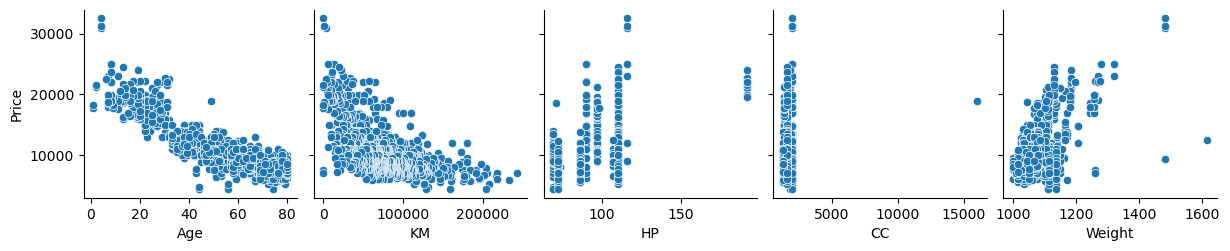

In [73]:
# Visualize relationships between features and target
sns.pairplot(data, y_vars='Price', x_vars=['Age', 'KM', 'HP', 'CC', 'Weight'])
plt.show()

<Axes: xlabel='Price', ylabel='Automatic'>

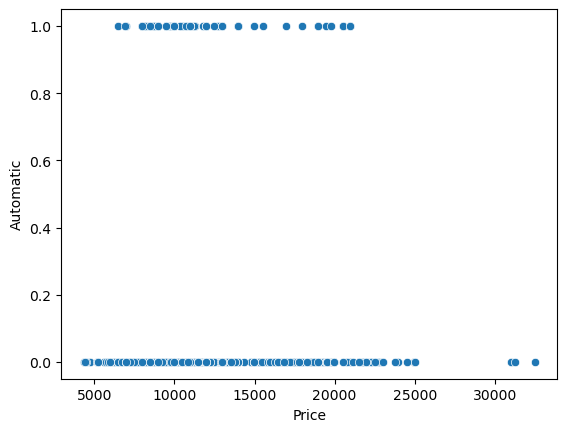

In [90]:
sns.scatterplot(x = 'Price', y ='Automatic', data = data)

<Axes: >

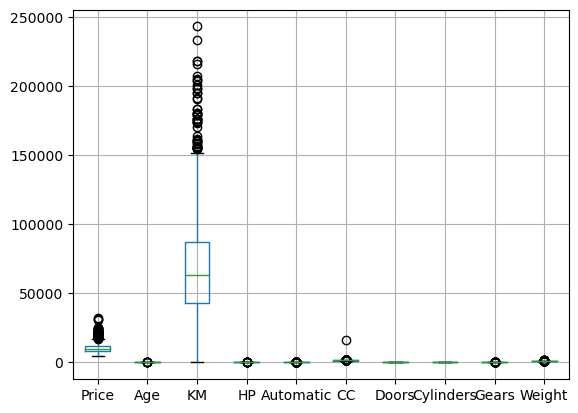

In [91]:
data.boxplot()

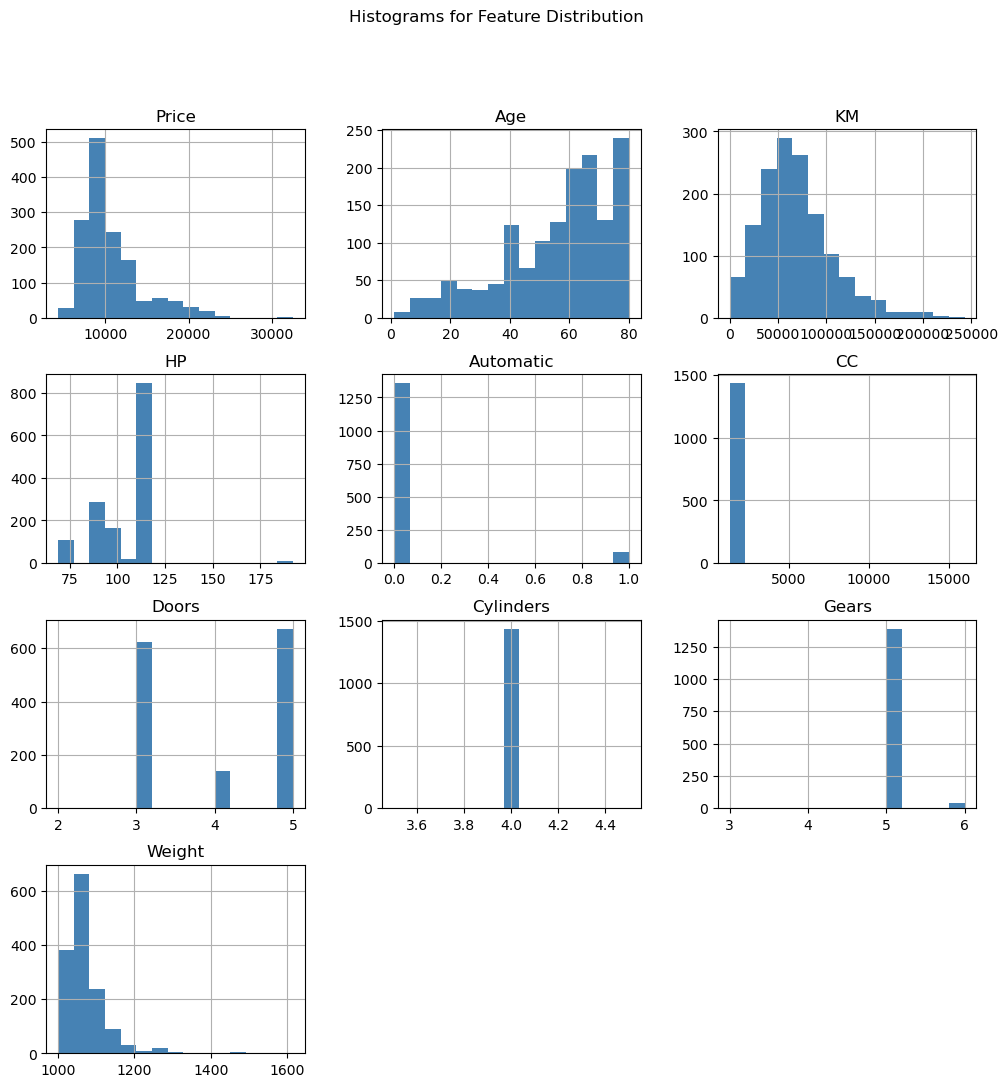

In [92]:
data.hist(bins = 15, figsize = (12, 12), color = 'steelblue')
plt.suptitle("Histograms for Feature Distribution")
plt.show()

In [93]:
# Encode categorical variables
categorical_features = ['FuelType', 'Automatic']
numeric_features = ['Age', 'KM', 'HP', 'CC', 'Doors', 'Weight', 'Quarterly_Tax']

In [94]:

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'KM', 'HP', 'CC', 'Weight']),  # Numerical features
        ('cat', OneHotEncoder(), ['Fuel_Type'])  # Categorical features
    ]
)

In [95]:
# Split the dataset into training and testing sets
X = data.drop('Price', axis=1)
y = data['Price']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
# Build pipelines for multiple linear regression
mlr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [98]:
print(data.columns)

Index(['Price', 'Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [99]:
# Train the model
mlr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'KM', 'HP', 'CC',
                                                   'Weight']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Fuel_Type'])])),
                ('regressor', LinearRegression())])

In [100]:
# Predict on the test set
y_pred = mlr_pipeline.predict(X_test)

In [101]:
# Evaluate the model
print("Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

Model Evaluation:
MAE: 1000.8738626461657
MSE: 2215881.459272436
RMSE: 1488.5837091922092
R²: 0.8339266636660894


In [102]:
# Lasso Regression
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))  # Adjust alpha as needed
])

In [103]:
lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)
print("\nLasso Regression:")
print("R²:", r2_score(y_test, y_pred_lasso))


Lasso Regression:
R²: 0.833951965564094


In [104]:
# Ridge Regression
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # Adjust alpha as needed
])

In [105]:
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)
print("\nRidge Regression:")
print("R²:", r2_score(y_test, y_pred_ridge))


Ridge Regression:
R²: 0.8343416284598777


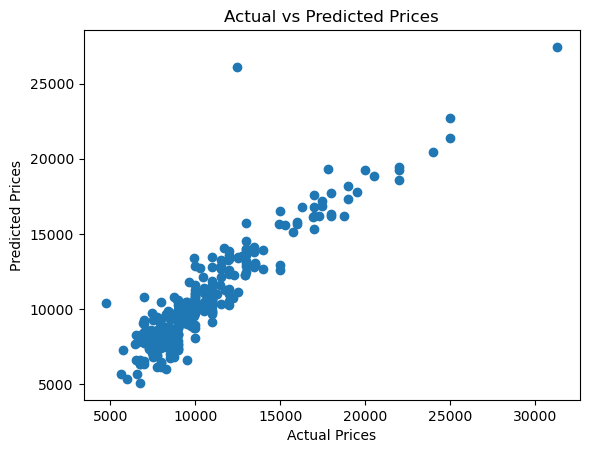

In [106]:
# Visualize residuals for the best model
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


## Interview Questions:


**1.What is Normalization & Standardization and how is it helpful?**

Normalization: Rescales data to a range [0, 1] or [-1, 1]. Helpful for algorithms like KNN or neural networks sensitive to magnitude. Standardization: Centers data around the mean with a standard deviation of 1. Useful for algorithms assuming Gaussian distributions (e.g., regression, PCA).




**2.What techniques can be used to address multicollinearity in multiple linear regression?**

Remove highly correlated predictors (e.g., using a correlation matrix).
Apply dimensionality reduction (e.g., PCA).
Use regularization techniques like Lasso (for feature selection) or Ridge regression.